### DATA VISUALIZATION

In [382]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sb

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

to_school = pd.read_pickle('./cleaned_data/valenzuela_to_school.pkl')
from_school = pd.read_pickle('./cleaned_data/valenzuela_from_school.pkl')


#### GENDER AND GRADE LEVEL OF STUDENTS

Gender by grade of respondents. For those responses where the parent or guardian answered the survey, it will be assumed that they answered with the gender and grade level of the student in mind.

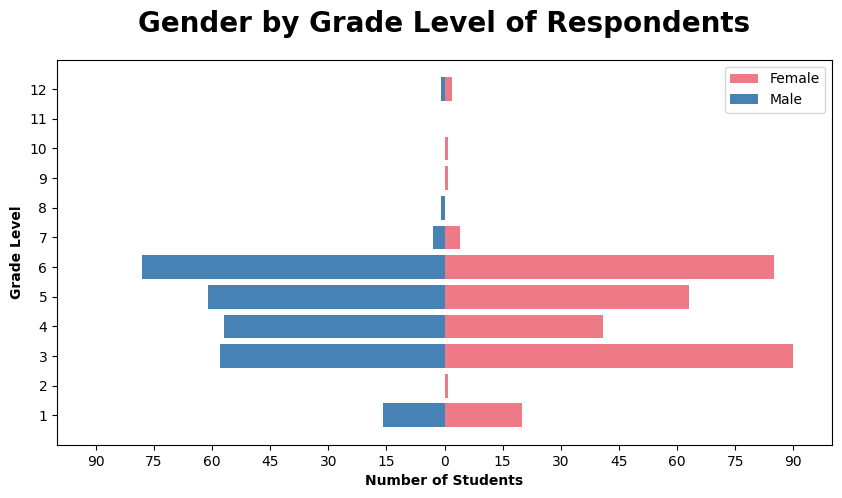

In [383]:
female_by_grade = to_school[to_school['sex'] == 'Female'].groupby(by=['grade'])['grade'].count()
male_by_grade = to_school[to_school['sex'] == 'Male'].groupby(by=['grade'])['grade'].count()
total = to_school.groupby(by=['grade'])['grade'].count()

grade_label = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
grade_levels = pd.DataFrame(grade_label, index=pd.RangeIndex(start=1, stop=13, name='index'), columns=['grade_level'])
gender_df = pd.concat([grade_levels,female_by_grade.rename('female'), male_by_grade.rename('male'), total.rename('total')], axis=1)
gender_df['male_left'] = -gender_df['male']

female_color = "#ee7a87"
male_color = "#4682b4"
plt.figure(figsize=(10,5))

plt.barh(y=gender_df['grade_level'], 
         width=gender_df['female'], 
         color=female_color, 
         label='Female')

plt.barh(y=gender_df['grade_level'], 
         width=gender_df['male'], 
         left=gender_df['male_left'], 
         color=male_color, 
         label='Male')

plt.xlim(-100,100)

plt.xticks(ticks=range(-90,100, 15), 
           labels=[f"{abs(i)}" for i in range(-90, 100, 15)] )

plt.xlabel('Number of Students', 
           fontweight='bold')

plt.ylabel('Grade Level', 
           fontweight='bold')

plt.title('Gender by Grade Level of Respondents', 
          fontweight='bold', 
          fontsize=20,
          loc='center', 
          pad=20)

plt.legend(loc='upper right')

plt.show()


#### MODE OF TRANSPORT OF STUDENTS

The visualization for the modes of transport will first be taken from `to_school['modes_of_transport']` and `from_school['modes_of_transport']`. The columns are entries that contain multiple modes of transport separated by commas. This can be treated as a list-like column which will be transformed such that each row contain only one mode of transport

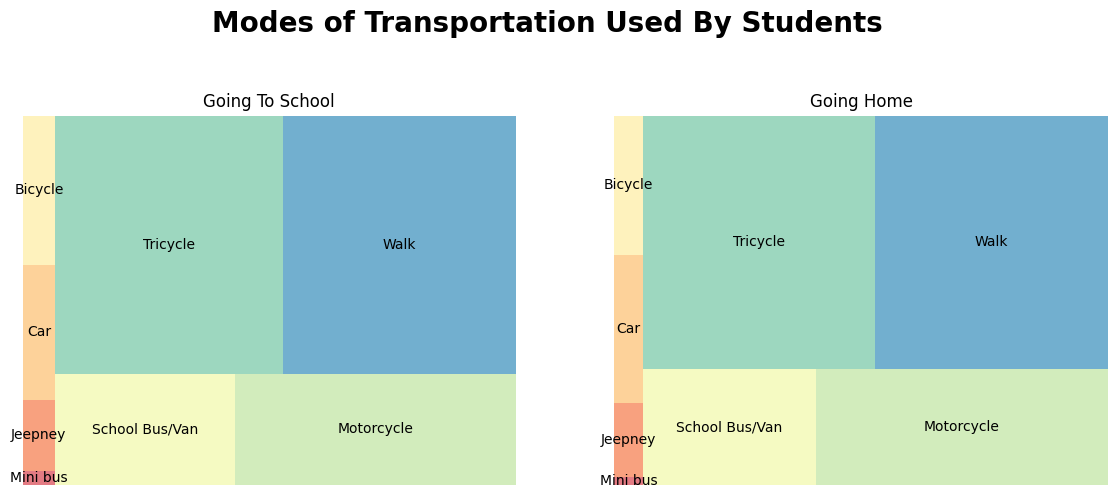

In [384]:
to_mode = to_school['modes_of_transport'].str.split(pat=', ').explode(ignore_index=True)
to_trans = to_mode.groupby(to_mode).count().sort_values()

from_mode = from_school['modes_of_transport'].str.split(', ').explode(ignore_index=True)
from_trans = from_mode.groupby(from_mode).count()


trans_df = pd.concat([to_trans.rename('To School'), from_trans.rename('From School')], axis=1)

labels = trans_df.index

data_to = trans_df['To School'].values
data_from = trans_df["From School"].values

fig, ax = plt.subplots(nrows=1, ncols=2)

# data = to_main.values
# labels = to_main.index

squarify.plot(sizes=data_to, 
              label=labels, 
              color=sb.color_palette('Spectral',  len(data_to)),
              text_kwargs={'fontsize':10},
              alpha=0.7,
              ax=ax[0])

squarify.plot(sizes=data_from, 
              label=labels, 
              color=sb.color_palette('Spectral',  len(data_from)),
              text_kwargs={'fontsize':10},
              alpha=0.7,
              ax=ax[1])

ax[0].axis('off')
ax[0].set_title('Going To School')

ax[1].axis('off')
ax[1].set_title('Going Home')

fig.set_figwidth(14)
plt.suptitle('Modes of Transportation Used By Students',
             fontsize=20,
             fontweight='bold',
             y=1.1)

plt.show()

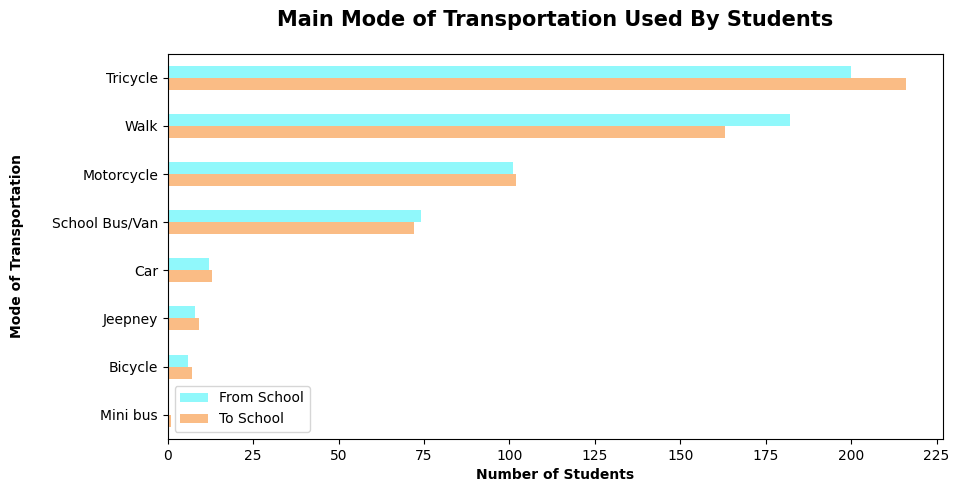

In [385]:
to_main = to_school.groupby(by=['main_mode'], observed=False)['main_mode'].count().sort_values()
from_main = from_school.groupby(by=['main_mode'], observed=False)['main_mode'].count()
trans_main_df = pd.concat([to_main.rename('To School'), from_main.rename('From School')], axis=1).fillna(0).astype('int')


trans_main_df.plot.barh(color=['#FABC85','#90F8FB'], figsize=(10,5))

plt.ylabel('Mode of Transportation',
           fontweight='bold',
           labelpad=20)

plt.xlabel('Number of Students',
           fontweight='bold')

plt.title('Main Mode of Transportation Used By Students',
          fontsize=15,
          fontweight='bold',
          pad=20)

plt.xticks(ticks=range(0, 250, 25))

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend(handles=[handles[i] for i in order],
           labels=[labels[i] for i in order] )


plt.show()

There was an increase in walking students and decrease in riding tricycles when going home. To investigate further, the relationship between travel time and main mode of transportation will be observed. Going to school and going home will be separated to see if there will be a change in transport mode since students generally do not rush to go home.  

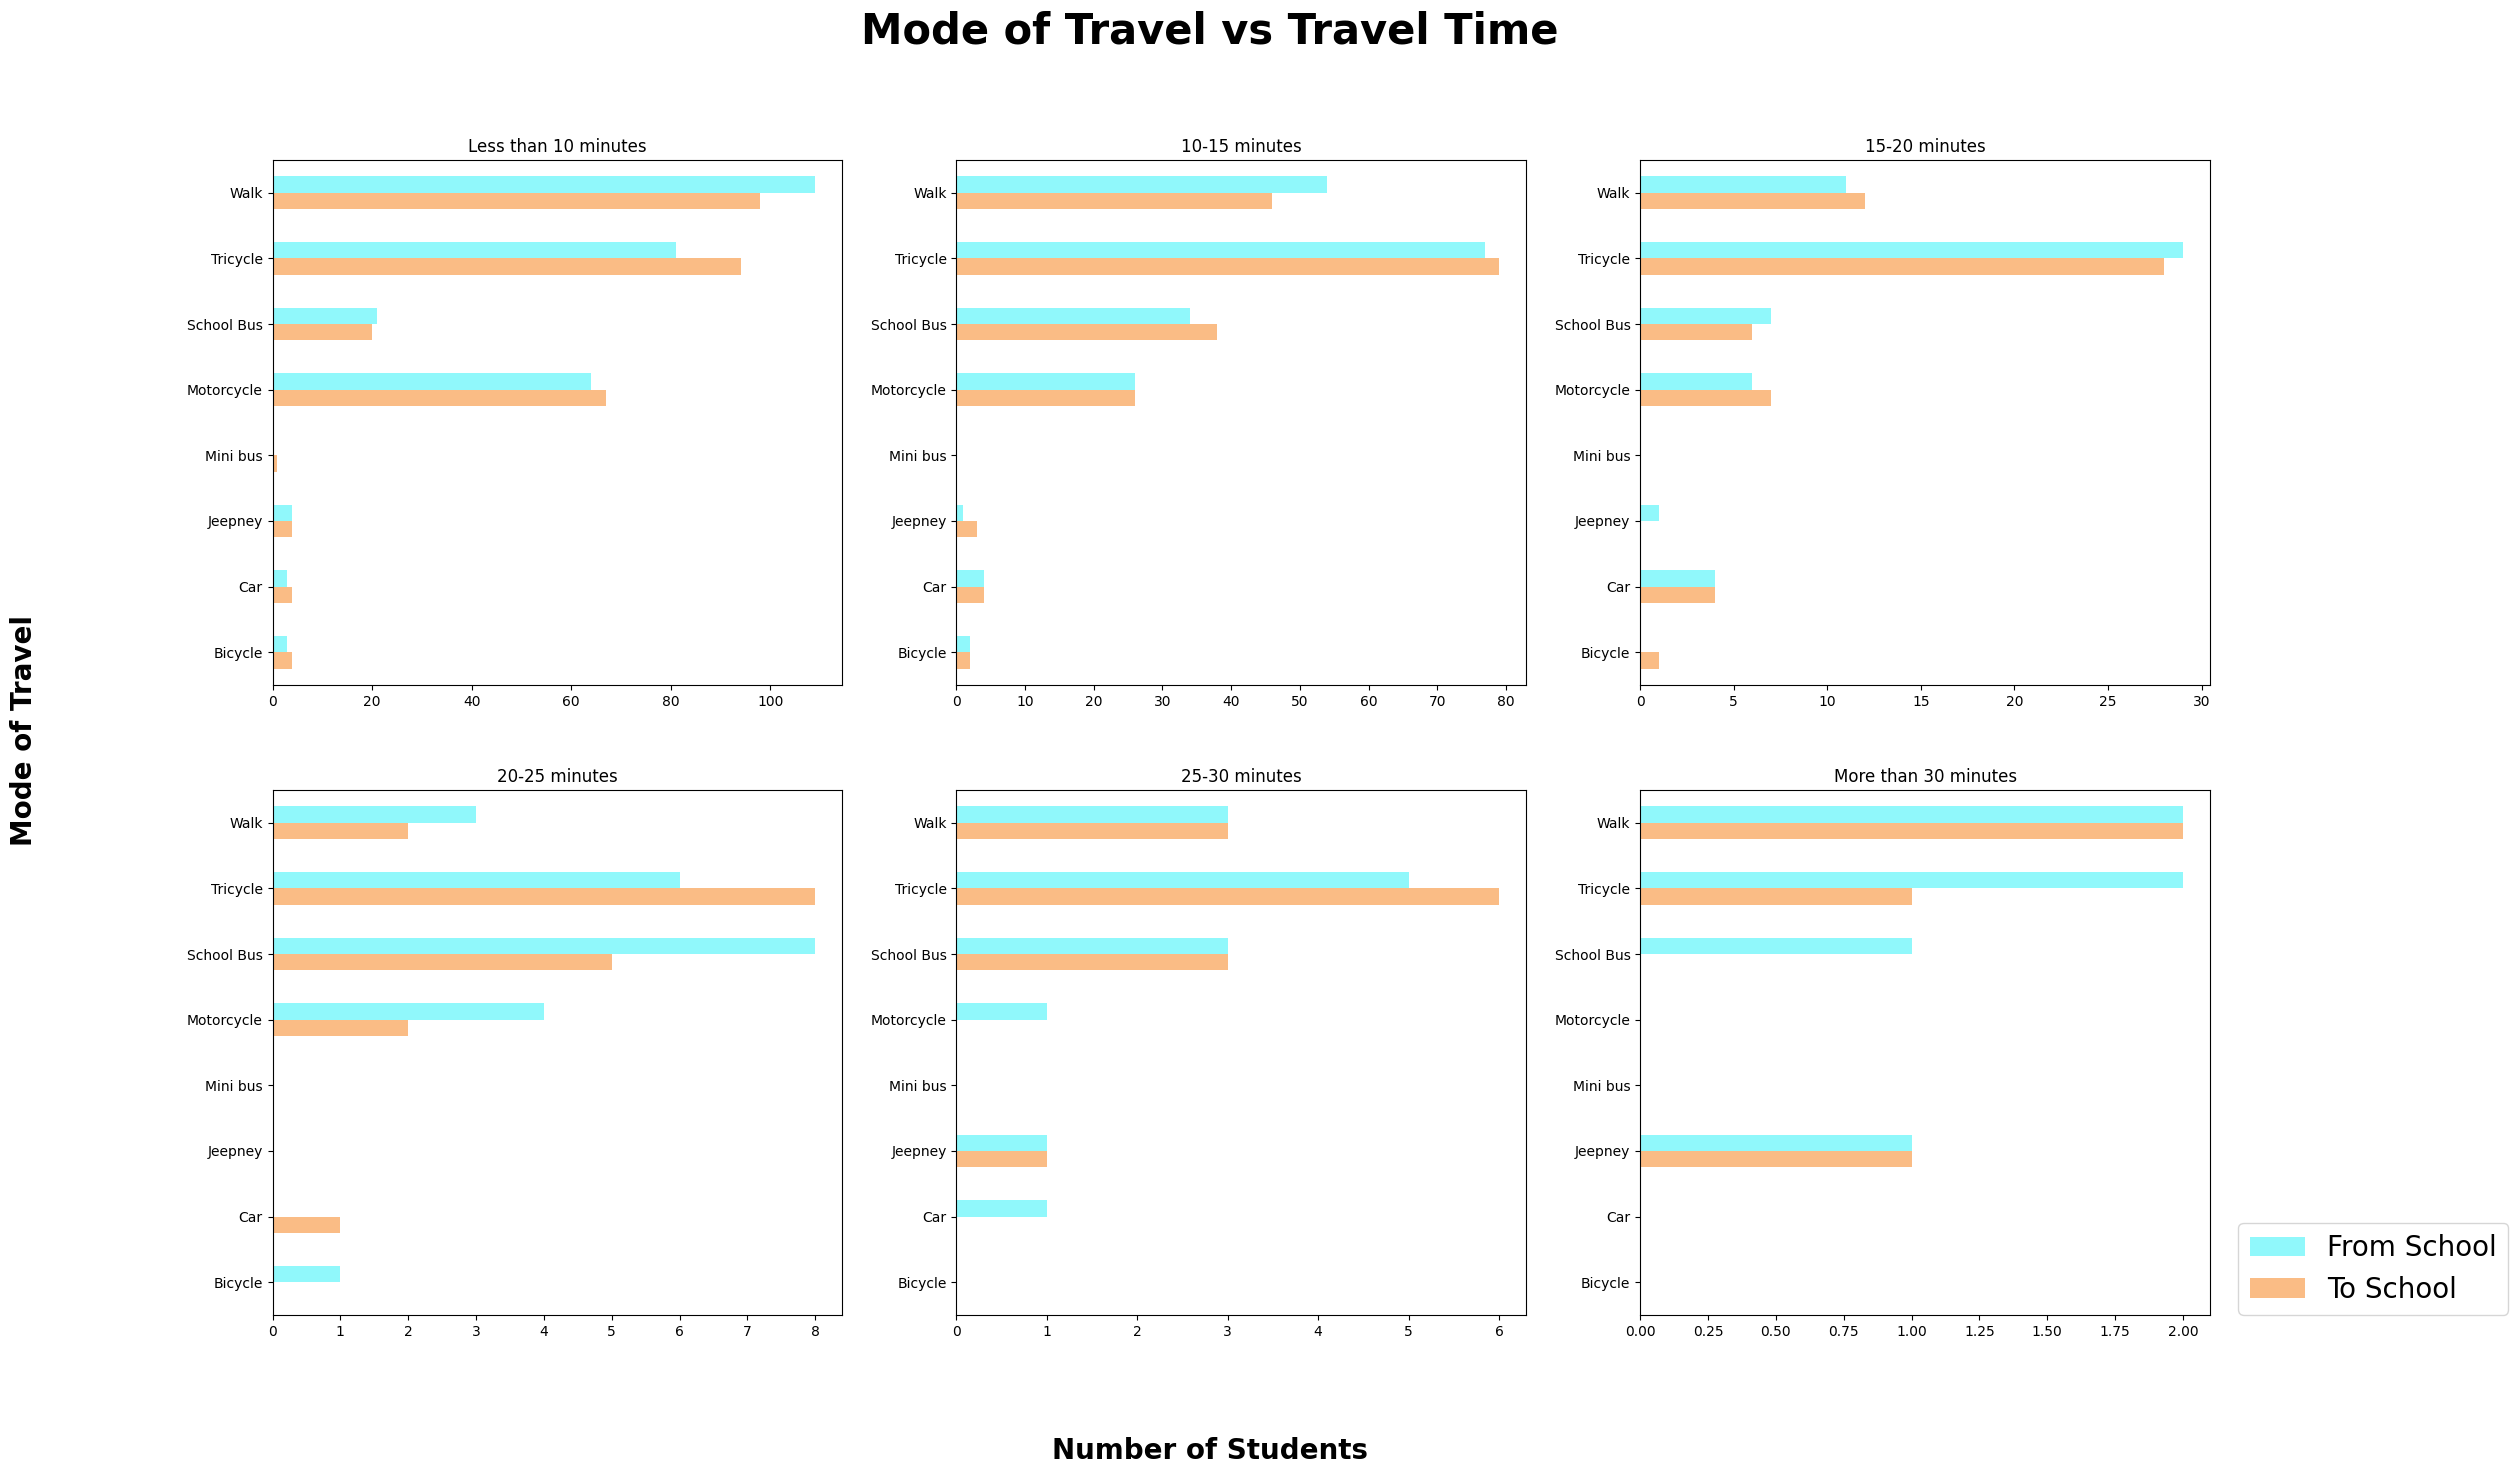

In [386]:
to_trans_time = to_school.groupby(by=['travel_time', 'main_mode'], observed=False)['main_mode'].count()
from_trans_time = from_school.groupby(by=['travel_time', 'main_mode'], observed=False)['main_mode'].count()
trans_time = pd.concat([to_trans_time.rename('To School'), from_trans_time.rename('From School')], axis=1).fillna(0).astype('int')

index_order = ['less than 10 minutes', '10-15 minutes', '15-20 minutes', '20-25 minutes', '25-30 minutes', 'more than 30 minutes']
trans_time = trans_time.reindex(labels=index_order, level=0)
trans_time = trans_time.rename(index={'School Bus/Van':'School Bus'}, level=1)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,15))

trans_time.loc['less than 10 minutes', :].plot.barh(ax=ax[0,0], color=['#FABC85','#90F8FB'])
trans_time.loc['10-15 minutes', :].plot.barh(ax=ax[0,1], color=['#FABC85','#90F8FB'])
trans_time.loc['15-20 minutes', :].plot.barh(ax=ax[0,2], color=['#FABC85','#90F8FB'])
trans_time.loc['20-25 minutes', :].plot.barh(ax=ax[1,0], color=['#FABC85','#90F8FB'])
trans_time.loc['25-30 minutes', :].plot.barh(ax=ax[1,1], color=['#FABC85','#90F8FB'])
trans_time.loc['more than 30 minutes', :].plot.barh(ax=ax[1,2], color=['#FABC85','#90F8FB'])

ax[0,0].set_title('Less than 10 minutes')
ax[0,1].set_title('10-15 minutes')
ax[0,2].set_title('15-20 minutes')
ax[1,0].set_title('20-25 minutes')
ax[1,1].set_title('25-30 minutes')
ax[1,2].set_title('More than 30 minutes')

handles, labels = ax[0,0].get_legend_handles_labels()

for i in range(2):
    for j in range(3):
        ax[i,j].set_ylabel(None)
        ax[i,j].get_legend().remove()

order = [1,0]

plt.legend(handles=[handles[i] for i in order],
           labels=[labels[i] for i in order],
           loc=(1.05, 0),
           fontsize=20)

fig.supxlabel('Number of Students',
              fontsize=20,
              fontweight='bold')

fig.supylabel('Mode of Travel',
              fontsize=20,
              fontweight='bold')

fig.suptitle('Mode of Travel vs Travel Time',
             fontsize=30,
             fontweight='bold')


plt.show()

#### COMPANION OF STUDENTS

First, the presence of companions going to school and going home will be investigated at a general level. This will be a simple groupby and count in the `df.[companion]` column.

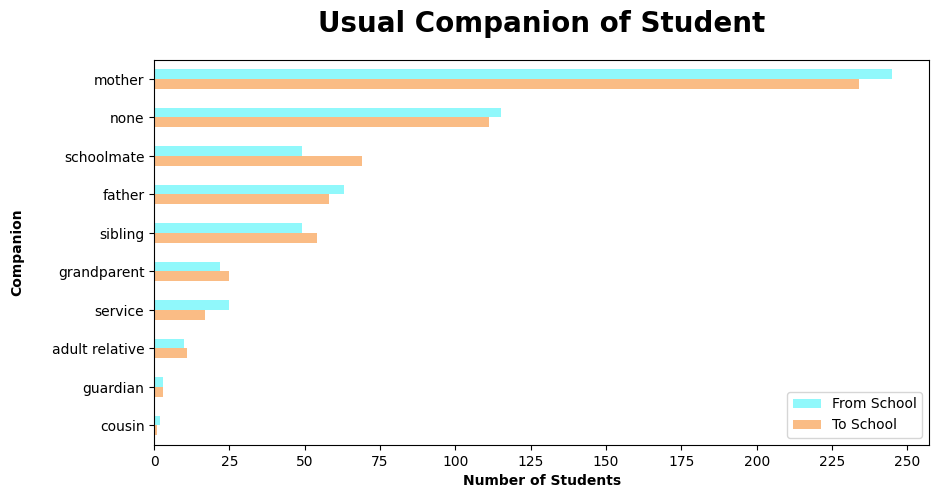

In [387]:
to_companion = to_school.groupby(by=['companion'], observed=True)['companion'].count().sort_values()
from_companion = from_school.groupby(by=['companion'], observed=True)['companion'].count().sort_values()


companion_df = pd.concat([to_companion.rename('To School'), from_companion.rename('From School')], axis=1)
companion_df.plot.barh(color=['#FABC85','#90F8FB'], figsize=(10,5))

plt.ylabel('Companion',
           labelpad=20,
           fontweight='bold')

plt.xlabel('Number of Students',
           fontweight='bold')

plt.title('Usual Companion of Student',
          fontsize=20,
          fontweight='bold',
          pad=20)

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]

plt.legend(handles=[handles[i] for i in order],
           labels=[labels[i]for i in order],
           loc='lower right')

plt.xticks(ticks=range(0,275, 25))

plt.show()

Next, the relationship between the presence of companion and grade level will be plotted. Keep in mind that the dataset does not contain an equal number of responses across all grade levels. If all grade levels were to be included, then the plot will produce a misleading figure. Hence, only grades 3, 4, 5 and 6 will be considered. 

The resulting plot is not representative of the whole student population, but it might lead to further insights. These insights will be used to produce better questionnaires in the second phase of the project.

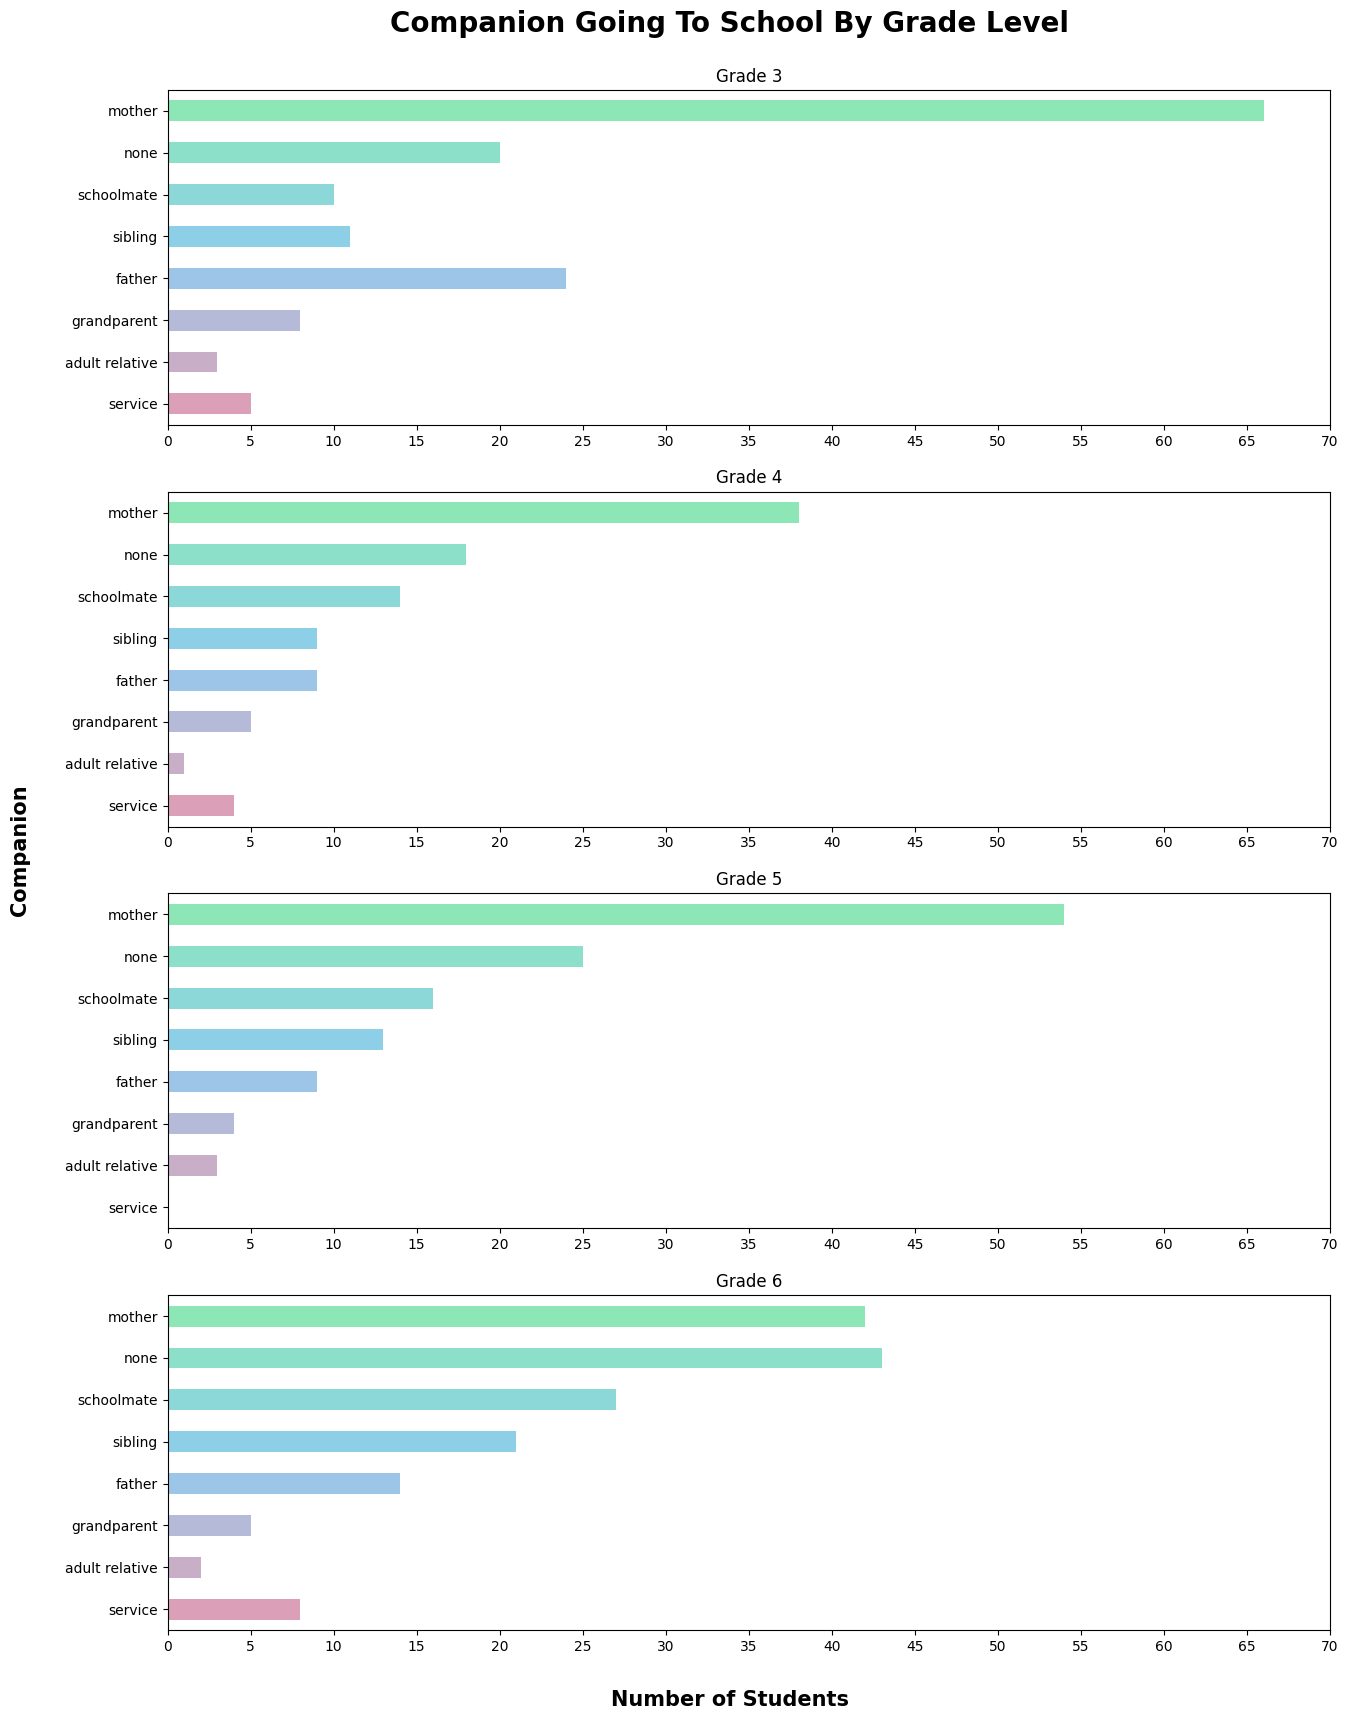

In [388]:
to_grade_comp = to_school[to_school['grade'].between(3,6)].groupby(['grade', 'companion'], observed=False)['companion'].count()
from_grade_comp = from_school[from_school['grade'].between(3,6)].groupby(['grade', 'companion'], observed=False)['companion'].count()
grade_comp_df = pd.concat([to_grade_comp.rename('To School'), from_grade_comp.rename('From School')], axis=1)

grade_comp_df.drop(labels=['cousin', 'guardian'], level=1, axis=0, inplace=True)

order = ['service', 'adult relative', 'grandparent', 'father', 'sibling','schoolmate', 'none', 'mother']

grade_comp_df = grade_comp_df.reindex(labels=order, level='companion')

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15,20))

colors=['#dba0b8', '#c9aec8', '#b5bad8', '#9cc5e7', '#8dcfe7', '#8cd7d8', '#8cdfc8', '#8ce6b6']
titles = ['Grade 3', 'Grade 4', 'Grade 5','Grade 6']

for i in range(4):
    grade_comp_df.loc[i+3,'To School'].plot.barh(ax=ax[i], legend=None)
    for patch, color in zip(ax[i].patches, colors):
        patch.set_facecolor(color)
    ax[i].set_xticks(ticks=range(0, 75, 5))
    ax[i].set_ylabel(None)
    ax[i].set_title(titles[i])


fig.supxlabel('Number of Students',
              fontsize=15,
              fontweight='bold',
              y=0.07)

fig.supylabel('Companion',
              fontsize=15,
              fontweight='bold')

fig.suptitle('Companion Going To School By Grade Level',
             fontsize=20,
             fontweight='bold',
             y=0.92)

plt.show()

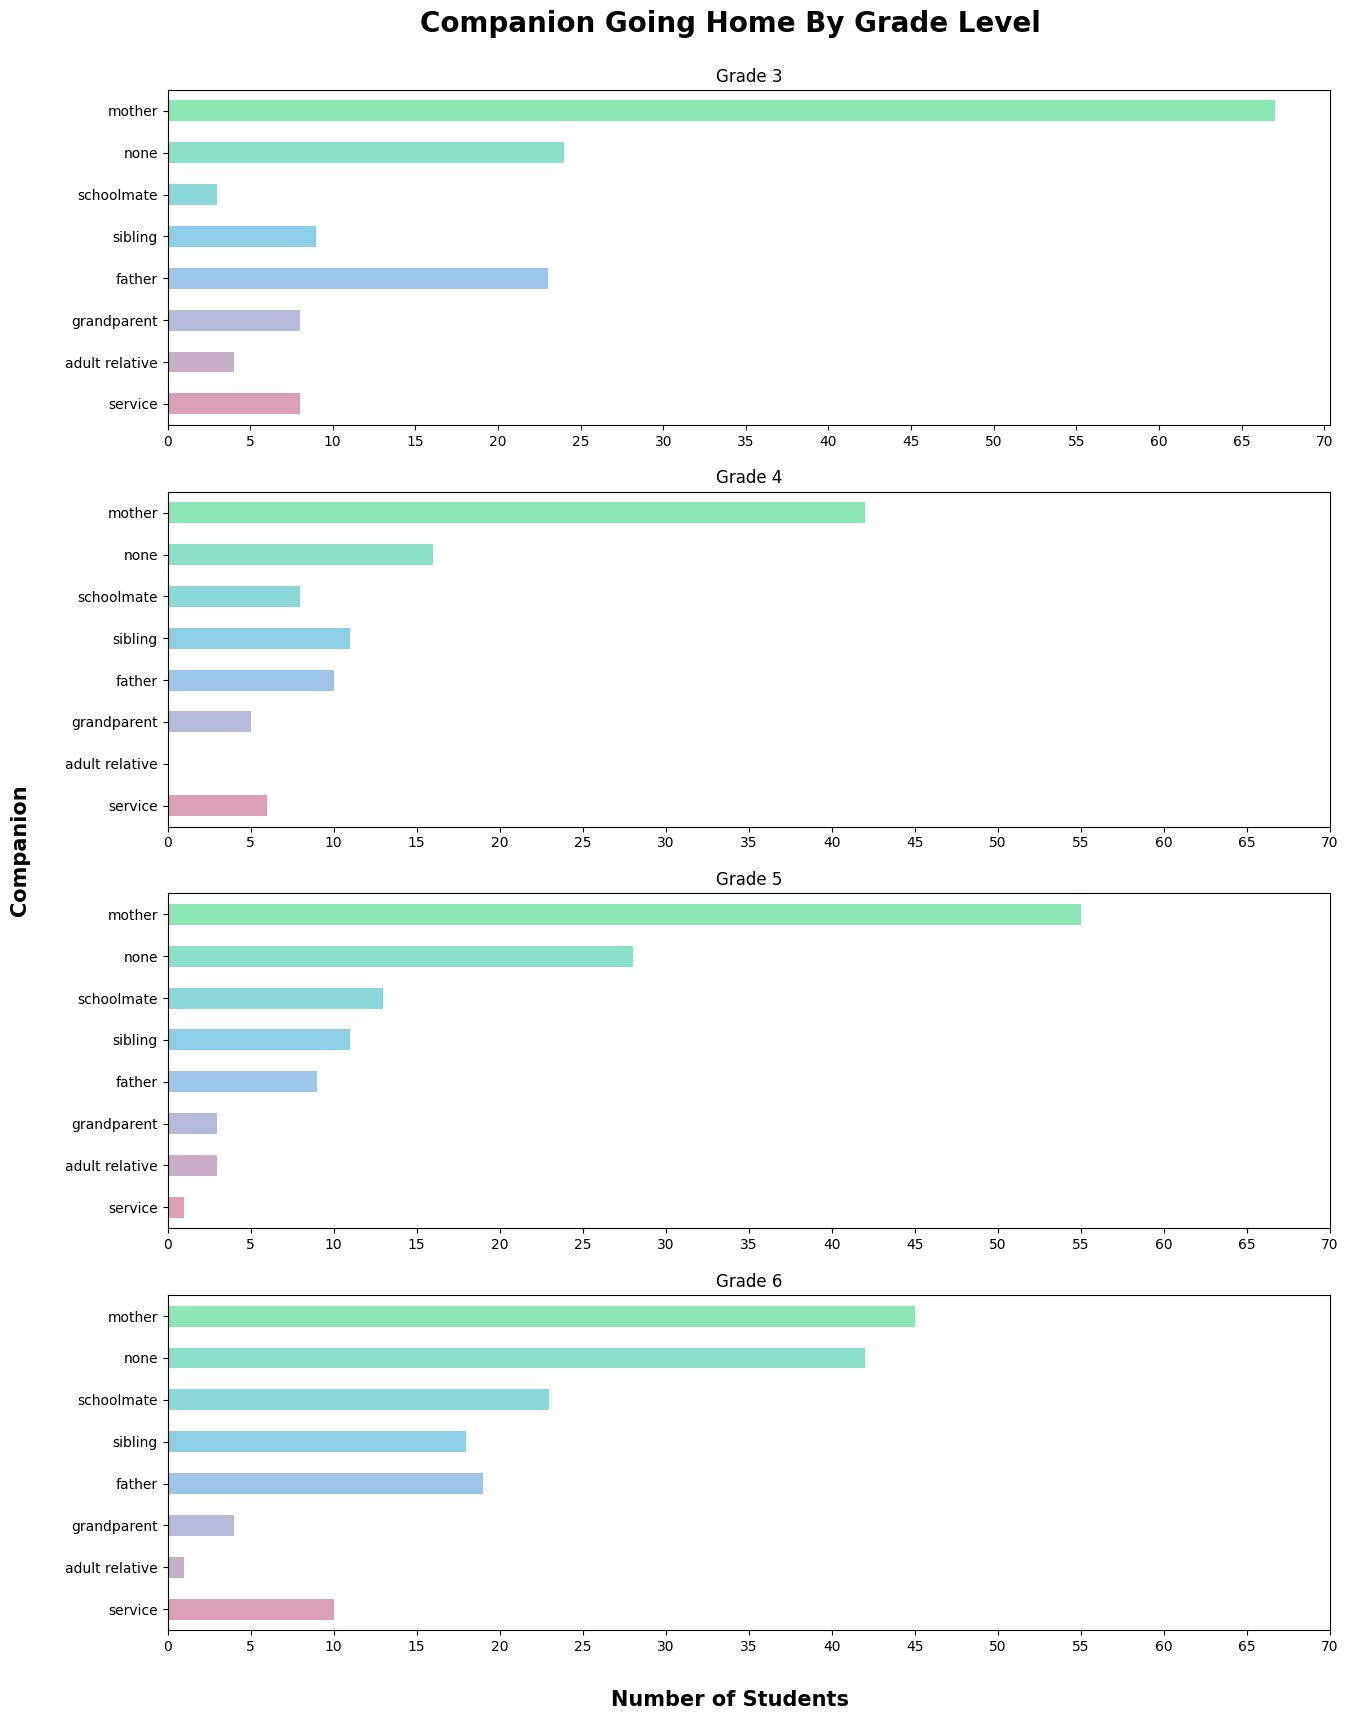

In [389]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15,20))

for i in range(4):
    grade_comp_df.loc[i+3,'From School'].plot.barh(ax=ax[i], legend=None)
    for patch, color in zip(ax[i].patches, colors):
        patch.set_facecolor(color)
    ax[i].set_xticks(ticks=range(0, 75, 5))
    ax[i].set_ylabel(None)
    ax[i].set_title(titles[i])


fig.supxlabel('Number of Students',
              fontsize=15,
              fontweight='bold',
              y=0.07)

fig.supylabel('Companion',
              fontsize=15,
              fontweight='bold')

fig.suptitle('Companion Going Home By Grade Level',
             fontsize=20,
             fontweight='bold',
             y=0.92)

plt.show()


#### MOTORCYCLE RIDERSHIP

Motorcycle ridership will be investigated since the trend of vehicular crashes in later years leans towards motorcycles. Specficically, the usage of helmet and the number of riders will be visualized.

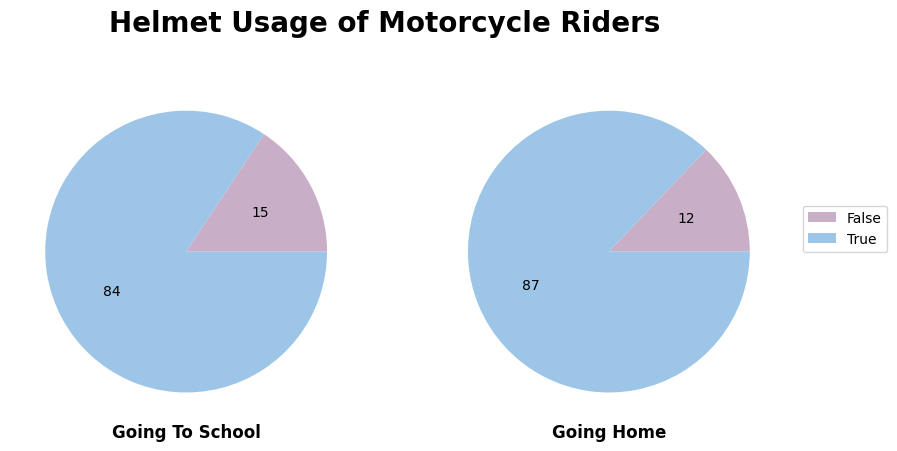

In [390]:
to_cycle_helmet = to_school.dropna(axis=0, subset=['-cycle_helmet']).groupby(['-cycle_helmet', 'main_mode'], observed=True)['-cycle_helmet'].count()
from_cycle_helmet = from_school.dropna(axis=0, subset=['-cycle_helmet']).groupby(['-cycle_helmet', 'main_mode'], observed=True)['-cycle_helmet'].count()
cycle_helmet = pd.concat([to_cycle_helmet.rename('To School'), from_cycle_helmet.rename('From School')], axis=1)



cycle_helmet = cycle_helmet.stack(level=[0]).unstack(level=0)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

cycle_helmet.loc[('Motorcycle','To School')].plot.pie(ax=ax[0], colors=['#c9aec8', '#9cc5e7'], autopct='%d', labeldistance=None, legend=True)
cycle_helmet.loc[('Motorcycle','From School')].plot.pie(ax=ax[1], colors=['#c9aec8', '#9cc5e7'], autopct='%d', labeldistance=None)

for i in range(2):
    ax[i].set_ylabel(None)

ax[0].set_title('Going To School',
                y=-.05,
                fontweight='bold')
ax[1].set_title('Going Home',
                y=-.05,
                fontweight='bold')

fig.suptitle("Helmet Usage of Motorcycle Riders",
             fontsize=20,
             fontweight='bold')



handles, labels = ax[0].get_legend_handles_labels()
ax[0].get_legend().remove()
order = [0,1]

plt.legend(handles=[handles[i] for i in order],
           labels=[labels[i] for i in order],
           loc=(1.05, 0.5),
           fontsize=10)

plt.show()

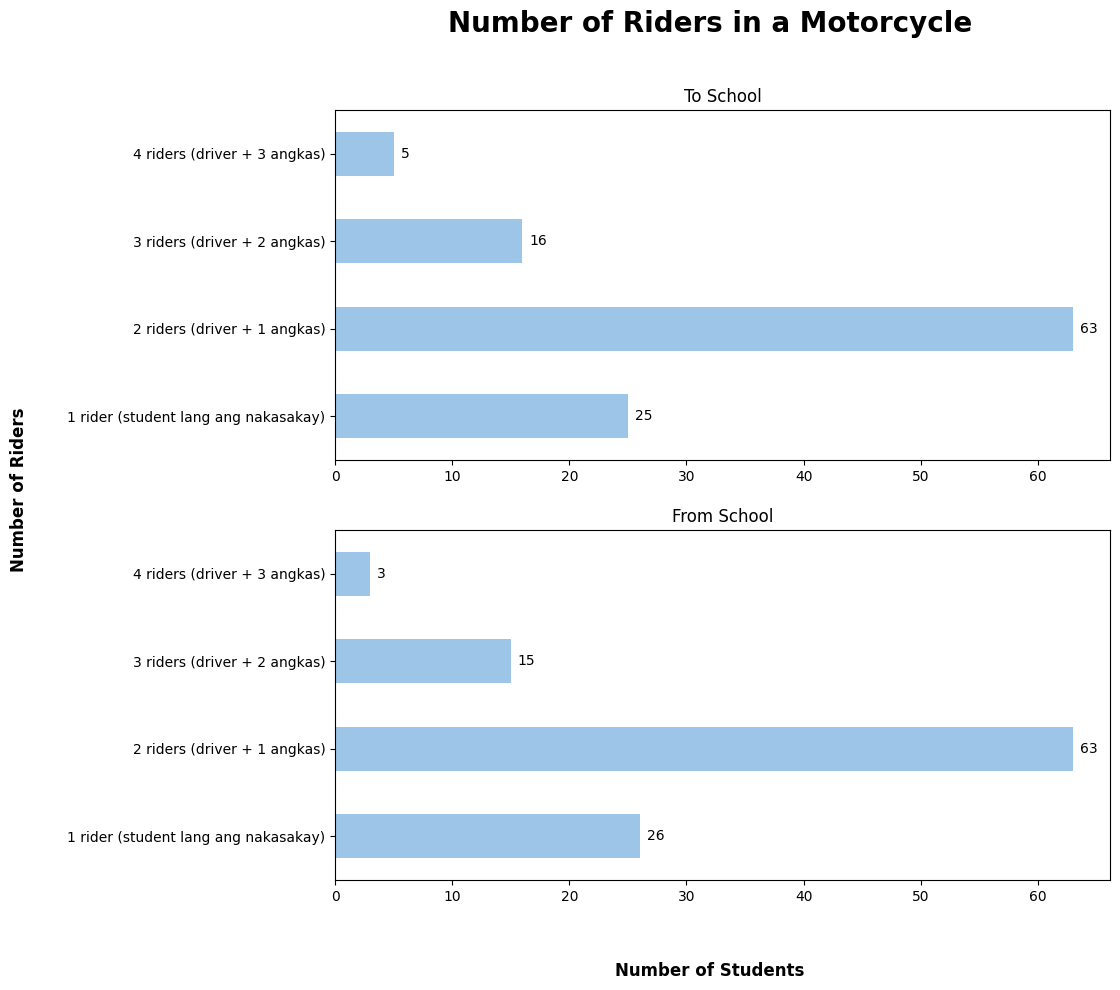

In [391]:
to_num_riders = to_school.dropna(axis=0, subset=['-cycle_number']).groupby(['-cycle_number', 'grade'], observed=True)['-cycle_number'].count()
from_num_riders = from_school.dropna(axis=0, subset=['-cycle_number']).groupby(['-cycle_number', 'grade'], observed=True)['-cycle_number'].count()

num_riders = pd.concat([to_num_riders.rename('To School'), from_num_riders.rename('From School')], axis=1)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

num_riders.loc[:,'To School'].groupby(level=0, observed=False).sum().plot.barh(ax=ax[0], color=['#9cc5e7'])
num_riders.loc[:,'From School'].groupby(level=0, observed=False).sum().plot.barh(ax=ax[1], color=['#9cc5e7'])

titles = ['To School', 'From School']
for i in range(2):
    ax[i].set_ylabel(None)
    ax[i].set_title(titles[i])
    for c in ax[i].containers:
        ax[i].bar_label(c, padding=5)

fig.supxlabel('Number of Students',
              fontweight='bold')

fig.supylabel('Number of Riders',
              fontweight='bold',
              x=-0.2)

fig.suptitle('Number of Riders in a Motorcycle',
             fontweight='bold',
             fontsize=20)

plt.show()

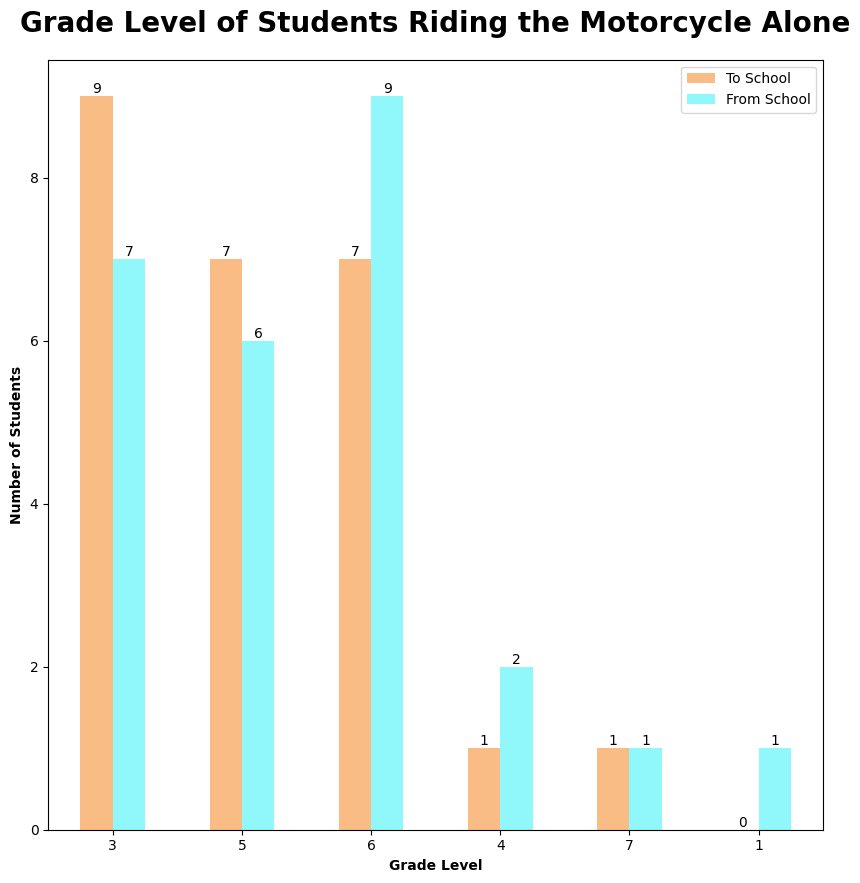

In [421]:
ax = num_riders.loc['1 rider (student lang ang nakasakay)'].sort_values(by='To School', ascending=False).plot.bar(color=['#FABC85','#90F8FB'], figsize=(10,10))

plt.xticks(rotation=0)
plt.ylabel('Number of Students',
           fontweight='bold')
plt.xlabel('Grade Level',
           fontweight='bold')
plt.title('Grade Level of Students Riding the Motorcycle Alone', 
          fontweight='bold',
          fontsize=20,
          pad=20)


for container in ax.containers:
    ax.bar_label(container)


plt.show()